In [1]:
import pandas as pd
import time, datetime, os
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import *
from math import *
import numpy as np
import kneed as kn
import plotly.express as px
import networkx as nx
import random as rn

### Import edge table for the target network

In [ ]:
os.getcwd() 

os.chdir('G:/My Drive/Rabome_Back_Up/UCD_2022/Data_retrieval_rabome/Network_Analysis')

In [3]:
# Choose from dictionary { YH : [path, columns_to_be_filtered if any, colour for the plots] }

net_dict = {"YH" : ['G:/My Drive/Rabome_Back_Up/UCD_2022/Network_Analysis/Cytoscape_OP_YH_edge_table.csv', ['AverageShortestPathLength', 'BetweennessCentrality', 'ClosenessCentrality', 'ClusteringCoefficient', 'Degree','Eccentricity', 'isExcludedFromPaths', 'isInPath', 'IsSingleNode', 'name', 'NeighborhoodConnectivity', 'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'PartnerOfMultiEdgedNodePairs', 'Radiality', 'selected', 'SelfLoops', 'shared name', 'Stress'], 'r'], 
            "YH_STRING" : ['G:/My Drive/Rabome_Back_Up/UCD_2022/Network_Analysis/Cytoscape_OP_YH_with_added_STRING_edges_edge_table.csv', ['display name','AverageShortestPathLength', 'BetweennessCentrality', 'ClosenessCentrality', 'ClusteringCoefficient', 'Degree','Eccentricity', 'isExcludedFromPaths', 'isInPath', 'IsSingleNode', 'name', 'NeighborhoodConnectivity', 'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'PartnerOfMultiEdgedNodePairs', 'query term', 'Radiality', 'selected', 'SelfLoops', 'shared name', 'Stress'], 'blue'],
            "YH_25" : ['G:/My Drive/Rabome_Back_Up/UCD_2022/Network_Analysis/YH_with_added_STRING_edges--25--add_edge_table.csv', ['display name','AverageShortestPathLength', 'BetweennessCentrality', 'ClosenessCentrality', 'ClusteringCoefficient', 'Degree','Eccentricity', 'isExcludedFromPaths', 'isInPath', 'IsSingleNode', 'name', 'NeighborhoodConnectivity', 'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'PartnerOfMultiEdgedNodePairs', 'query term', 'Radiality', 'selected', 'SelfLoops', 'shared name', 'Stress'], 'g'],
            "YH_50" : ['G:/My Drive/Rabome_Back_Up/UCD_2022/Network_Analysis/YH_with_added_STRING_edges--50--add_edge_table.csv', ['display name','AverageShortestPathLength', 'BetweennessCentrality', 'ClosenessCentrality', 'ClusteringCoefficient', 'Degree','Eccentricity', 'isExcludedFromPaths', 'isInPath', 'IsSingleNode', 'name', 'NeighborhoodConnectivity', 'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'PartnerOfMultiEdgedNodePairs', 'query term', 'Radiality', 'selected', 'SelfLoops', 'shared name', 'Stress'], 'g'],
            "YH_75" : ['G:/My Drive/Rabome_Back_Up/UCD_2022/Network_Analysis/YH_with_added_STRING_edges--75--add_edge_table.csv', ['display name','AverageShortestPathLength', 'BetweennessCentrality', 'ClosenessCentrality', 'ClusteringCoefficient', 'Degree','Eccentricity', 'isExcludedFromPaths', 'isInPath', 'IsSingleNode', 'name', 'NeighborhoodConnectivity', 'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'PartnerOfMultiEdgedNodePairs', 'query term', 'Radiality', 'selected', 'SelfLoops', 'shared name', 'Stress'], 'pink'],
            "YH_100" : ['G:/My Drive/Rabome_Back_Up/UCD_2022/Network_Analysis/YH_with_added_STRING_edges--100--add_edge_table.csv', ['display name','AverageShortestPathLength', 'BetweennessCentrality', 'ClosenessCentrality', 'ClusteringCoefficient', 'Degree','Eccentricity', 'isExcludedFromPaths', 'isInPath', 'IsSingleNode', 'name', 'NeighborhoodConnectivity', 'NumberOfDirectedEdges', 'NumberOfUndirectedEdges', 'PartnerOfMultiEdgedNodePairs', 'query term', 'Radiality', 'selected', 'SelfLoops', 'shared name', 'Stress'], 'cyan']           
           }

choice = "YH_STRING" # for Node table from YH interactions only
# choice = "YH_STRING" # for Node table for YH + STRING interactions

path = net_dict[choice][0]; cols = net_dict[choice][1]; col = net_dict[choice][2]
path, cols, col   # Need to be changed a per edge table

('G:/My Drive/Rabome_Back_Up/UCD_2022/Network_Analysis/Cytoscape_OP_YH_with_added_STRING_edges_edge_table.csv',
 ['display name',
  'AverageShortestPathLength',
  'BetweennessCentrality',
  'ClosenessCentrality',
  'ClusteringCoefficient',
  'Degree',
  'Eccentricity',
  'isExcludedFromPaths',
  'isInPath',
  'IsSingleNode',
  'name',
  'NeighborhoodConnectivity',
  'NumberOfDirectedEdges',
  'NumberOfUndirectedEdges',
  'PartnerOfMultiEdgedNodePairs',
  'query term',
  'Radiality',
  'selected',
  'SelfLoops',
  'shared name',
  'Stress'],
 'blue')

In [5]:
# Import mega_4

df = pd.read_csv(path, sep=',', na_filter= False)
print("Last modified: %s" % time.ctime(os.path.getmtime(path)))

df.head()

Last modified: Sun Sep 25 20:55:37 2022


,__glayCluster,EdgeBetweenness,interaction,isInPath,name,selected,shared interaction,shared name,stringdb::coexpression,stringdb::cooccurrence,stringdb::databases,stringdb::experiments,stringdb::fusion,stringdb::interspecies,stringdb::neighborhood,stringdb::score,stringdb::textmining,Type_of_interaction
0,1,257.863840,interacts with,False,RAB29 (interacts with) C9ORF72,False,interacts with,RAB29 (interacts with) C9ORF72,,,,,,,,,,Effector_Binding_Protein
1,,305.834334,interacts with,False,RAB29 (interacts with) LRRK2,False,interacts with,RAB29 (interacts with) LRRK2,0.062,,,0.662,,,,0.996,0.989,Effector_Binding_Protein
2,1,190.570554,pp,False,DYNC1LI1 (pp) HSP90AA1,False,pp,DYNC1LI1 (pp) HSP90AA1,0.062,,0.9,,,,,0.91,0.126,
3,1,132.943952,pp,False,DYNC1LI1 (pp) DYNLT1,False,pp,DYNC1LI1 (pp) DYNLT1,0.053,,0.72,0.877,,,,0.991,0.758,
4,1,23.451123,pp,False,DYNC1LI1 (pp) DYNC1I2,False,pp,DYNC1LI1 (pp) DYNC1I2,0.108,,0.8,0.9,,,,0.994,0.749,


In [10]:
# Functions' corollary

nx.degree(G)  #.edges()
nx.nodes(G)
nx.connected_components(G)
nx.number_connected_components(G)

1

In [14]:
# Functions' corollary

G = nx.from_edgelist(edgelist)
print(len(list(G.edges())), len(list(G.nodes())), nx.number_connected_components(G))
rand_nodes_removal = rn.sample(list(nx.nodes(G)), k=20)
G.remove_nodes_from(rand_nodes_removal)

print(len(list(G.edges())), len(list(G.nodes())), nx.number_connected_components(G), rand_nodes_removal)
comps = list(nx.connected_components(G))
print([len(comps[x]) for x in range(0, len(comps))])

1828 421 1
1655 401 6 ['USP6NL', 'TBXA2R', 'RAB29', 'ANKRD27', 'KIF1C', 'EVI5L', 'MICAL1', 'RAB8A', 'OSBPL1A', 'DENND2A', 'SYTL2', 'TBC1D9B', 'VAMP7', 'RME8', 'RAB19', 'WDR44', 'TPD52', 'GOLGA2', 'EPG5', 'NDRG1']
[396, 1, 1, 1, 1, 1]


### Imported edge table to networkx object G

In [ ]:
# Pandas dataframe --> edgelist --> graph object G

edgelist = list()
for pair in df['shared name']:
    edgelist.append((pair.split(' ')[::len(pair.split(' '))-1]))

In [ ]:
G = nx.from_edgelist(edgelist)

In [245]:
def modified_shannon_div(reps, edgelist, ):
    """
    Input params: 
        edgelist: List of node pairs forming the network
        reps: Iterations to perform serial node removal; default=1
        
    Output Params: 
        Dictionary with { #Nodes removed : [ Average Entropy from r interations, Average size of components formed for this #removed nodes ] }
    """
    
    
    f_to_Hmsh = {}
    isolated_comps = {}
    G = nx.from_edgelist(edgelist); N = len(list(G.nodes()));
    node_remv_rates = [ceil(x) for x in np.linspace(0, 421, num=30)]


    for f in node_remv_rates:
        Hmsh=[];  mean_no_comps_list=[]
        for r in range(0, reps+1):
            G = nx.from_edgelist(edgelist)
            rand_nodes_removal = rn.sample(list(nx.nodes(G)), k=f)
            G.remove_edges_from(list(G.edges(rand_nodes_removal)))

            comps = list(nx.connected_components(G))
            Ci = [len(comps[x]) for x in range(0, len(comps))]

            # Get modified entropy H for this iteration    
            Hmsh.append(abs(sum([c*log(c/N)/N for c in Ci]))/log(N))      # Sum of entropies of all fragments/ components (H) added in list
            mean_no_comps_list.append(len(comps))                         # Component size added to the list

        ''' '''
        f_to_Hmsh.update({f:[mean(Hmsh), ceil(mean(mean_no_comps_list))]})   
    return f_to_Hmsh    

def plots_for_resilience(dict_from_Shann_Div):
    """
    Input params: 
        Dictionary from 
    Output params:
        Plot1: Entropy (H) vs failure rates f ranging [0,1] (Exported to curr_dir)
        Plot2: ??
        Stats_summary: (1 - Area under the curve) aka Resilience
    """
    fig = px.line(x = f_to_Hmsh.keys(), y = [x[0] for x in f_to_Hmsh.values()], title = "Entropy (Modified Shannon diversity) for failure rates [0,1]")
    fig.show()
    fig.save("_".join([choice, 'Resilience.png']))

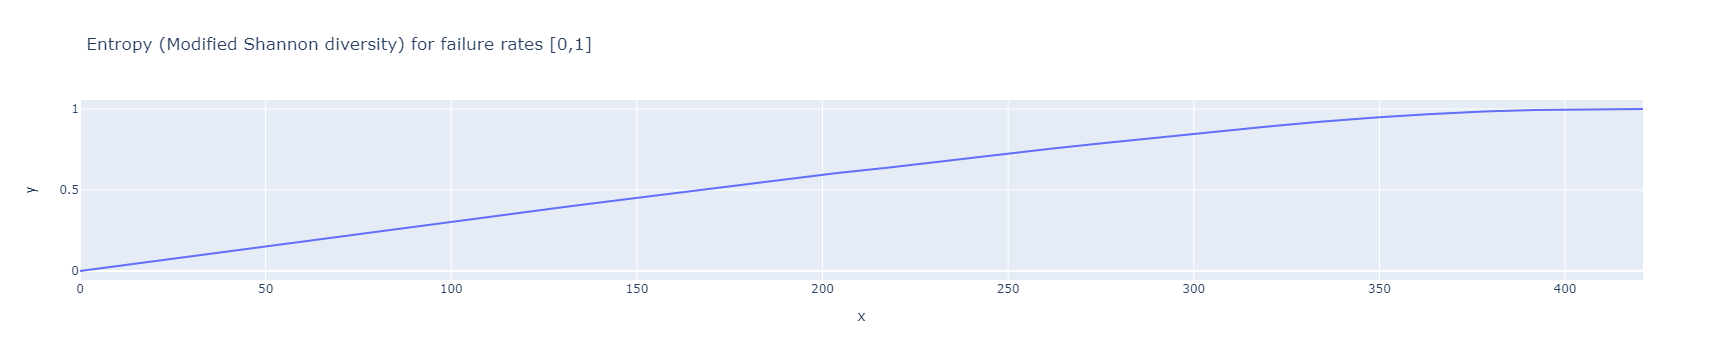

In [247]:
# Plot the Entropy to find area above the curve aka Resilience

fig = px.line(x = f_to_Hmsh.keys(), y = [x[0] for x in f_to_Hmsh.values()], title = "Entropy (Modified Shannon diversity) for failure rates [0,1]")
fig.show()
fig.write_html("_".join([choice, 'Resilience.html']))